# Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

Start off with the necessary data inspection and EDA tasks suitable for this dataset - data cleaning, univariate analysis, bivariate analysis etc.
Outlier Analysis: You must perform the Outlier Analysis on the dataset. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all you need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results you get.
Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters.
Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.
Also, you need to perform visualisations on the clusters that have been formed.  You can do this by choosing any two of the three variables mentioned above on the X-Y axes and plotting a scatter plot of all the countries and differentiating the clusters. Make sure you create visualisations for all the three pairs. You can also choose other types of plots like boxplots, etc. 
Both K-means and Hierarchical may give different results because of previous analysis (whether you chose to keep or remove the outliers, how many clusters you chose,  etc.) Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO since they depend upon the preceding analysis as well. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.
 

# Reading the Data

In [209]:
import numpy as np
import pandas as pd

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree



# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
ngo_df=pd.read_csv('Country-data.csv')
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [211]:
# basic information of the dataframe
ngo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [212]:
# Shape of the dataframe (Rows & Columns)
ngo_df.shape

(167, 10)

In [213]:
# Descriptive Statistics for Numerical columns

ngo_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Missing value check

In [214]:
round(100*(ngo_df.isnull().sum())/len(ngo_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

We can see no missing values present in the dataframe

In [215]:
# Checking for duplicates and dropping the entire duplicate row if any
ngo_df.drop_duplicates(subset=None, inplace=True)

# Data Transformation

In our dataframe (ngo_df), the 'imports', 'exports' and 'health' variable are in percentage of GDP per capita, and this can sometimes give a incorrect insight in our EDA. For example, the health spending of 'United states' is 17.9 and that of 'Sierra Leone' is '13.1', both of which are very close to each other in health spending in terms of their % of GDP per capita. But these figures do not actually tell us the real story of how rich and poor are 'USA' and 'Sierra Leone' is. So the best way to tackle it is to convert the % values to ABSOLUTE values

In [216]:
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [217]:
# Converting imports, exports and health spending percentages to absolute values.

ngo_df['imports'] = ngo_df['imports'] * ngo_df['gdpp']/100
ngo_df['exports'] = ngo_df['exports'] * ngo_df['gdpp']/100
ngo_df['health'] = ngo_df['health'] * ngo_df['gdpp']/100

In [218]:
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Checking the Outlier values

In [219]:
#ignoring the country column as it is an object/string type

f=ngo_df.columns[1:]

In [220]:
f

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

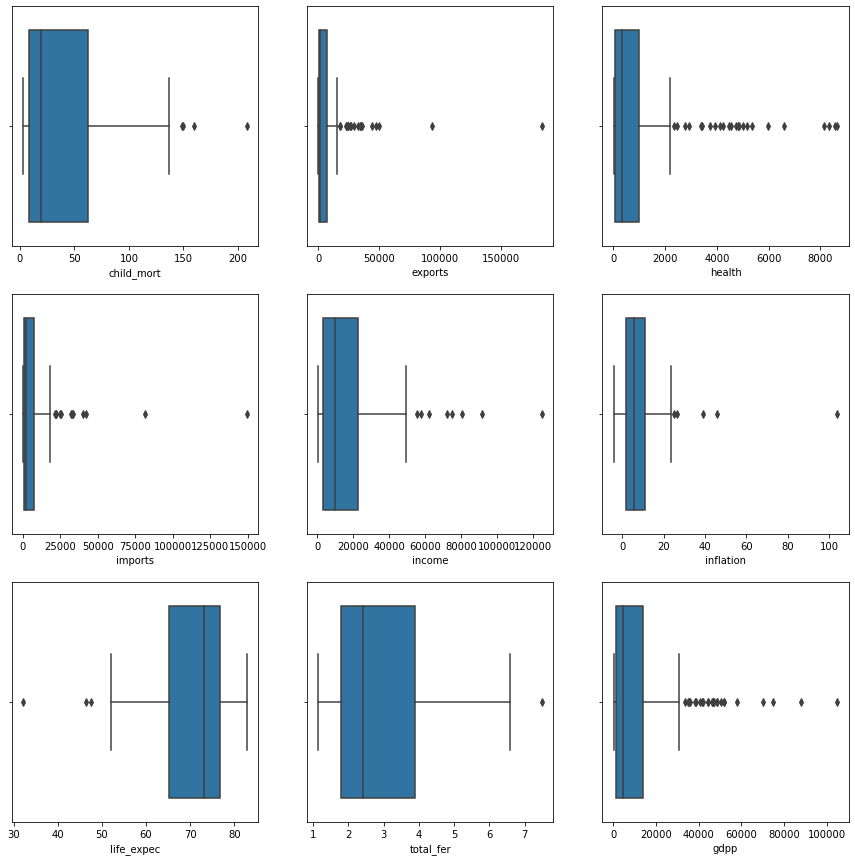

In [221]:

plt.figure(figsize=(15,15))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1],data=ngo_df)

We can see that outliers are present for all variables .If we apply capping(based on IQR treatment) now ranking of countries would change with respect to the business problem i.e of providing the country that actually require financial aid. If we do not apply Outlier treatment, it can impact the clustering model, as the presence of Outlier can change the CENTROID (K-Means) of the cluster. 

As the end goal is to achieve the business goal for now Outlier treatment is avoided and model with different K-values will be checked giving better business outcome 

# Exploratory Data Analysis

In [222]:
num_df= ngo_df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

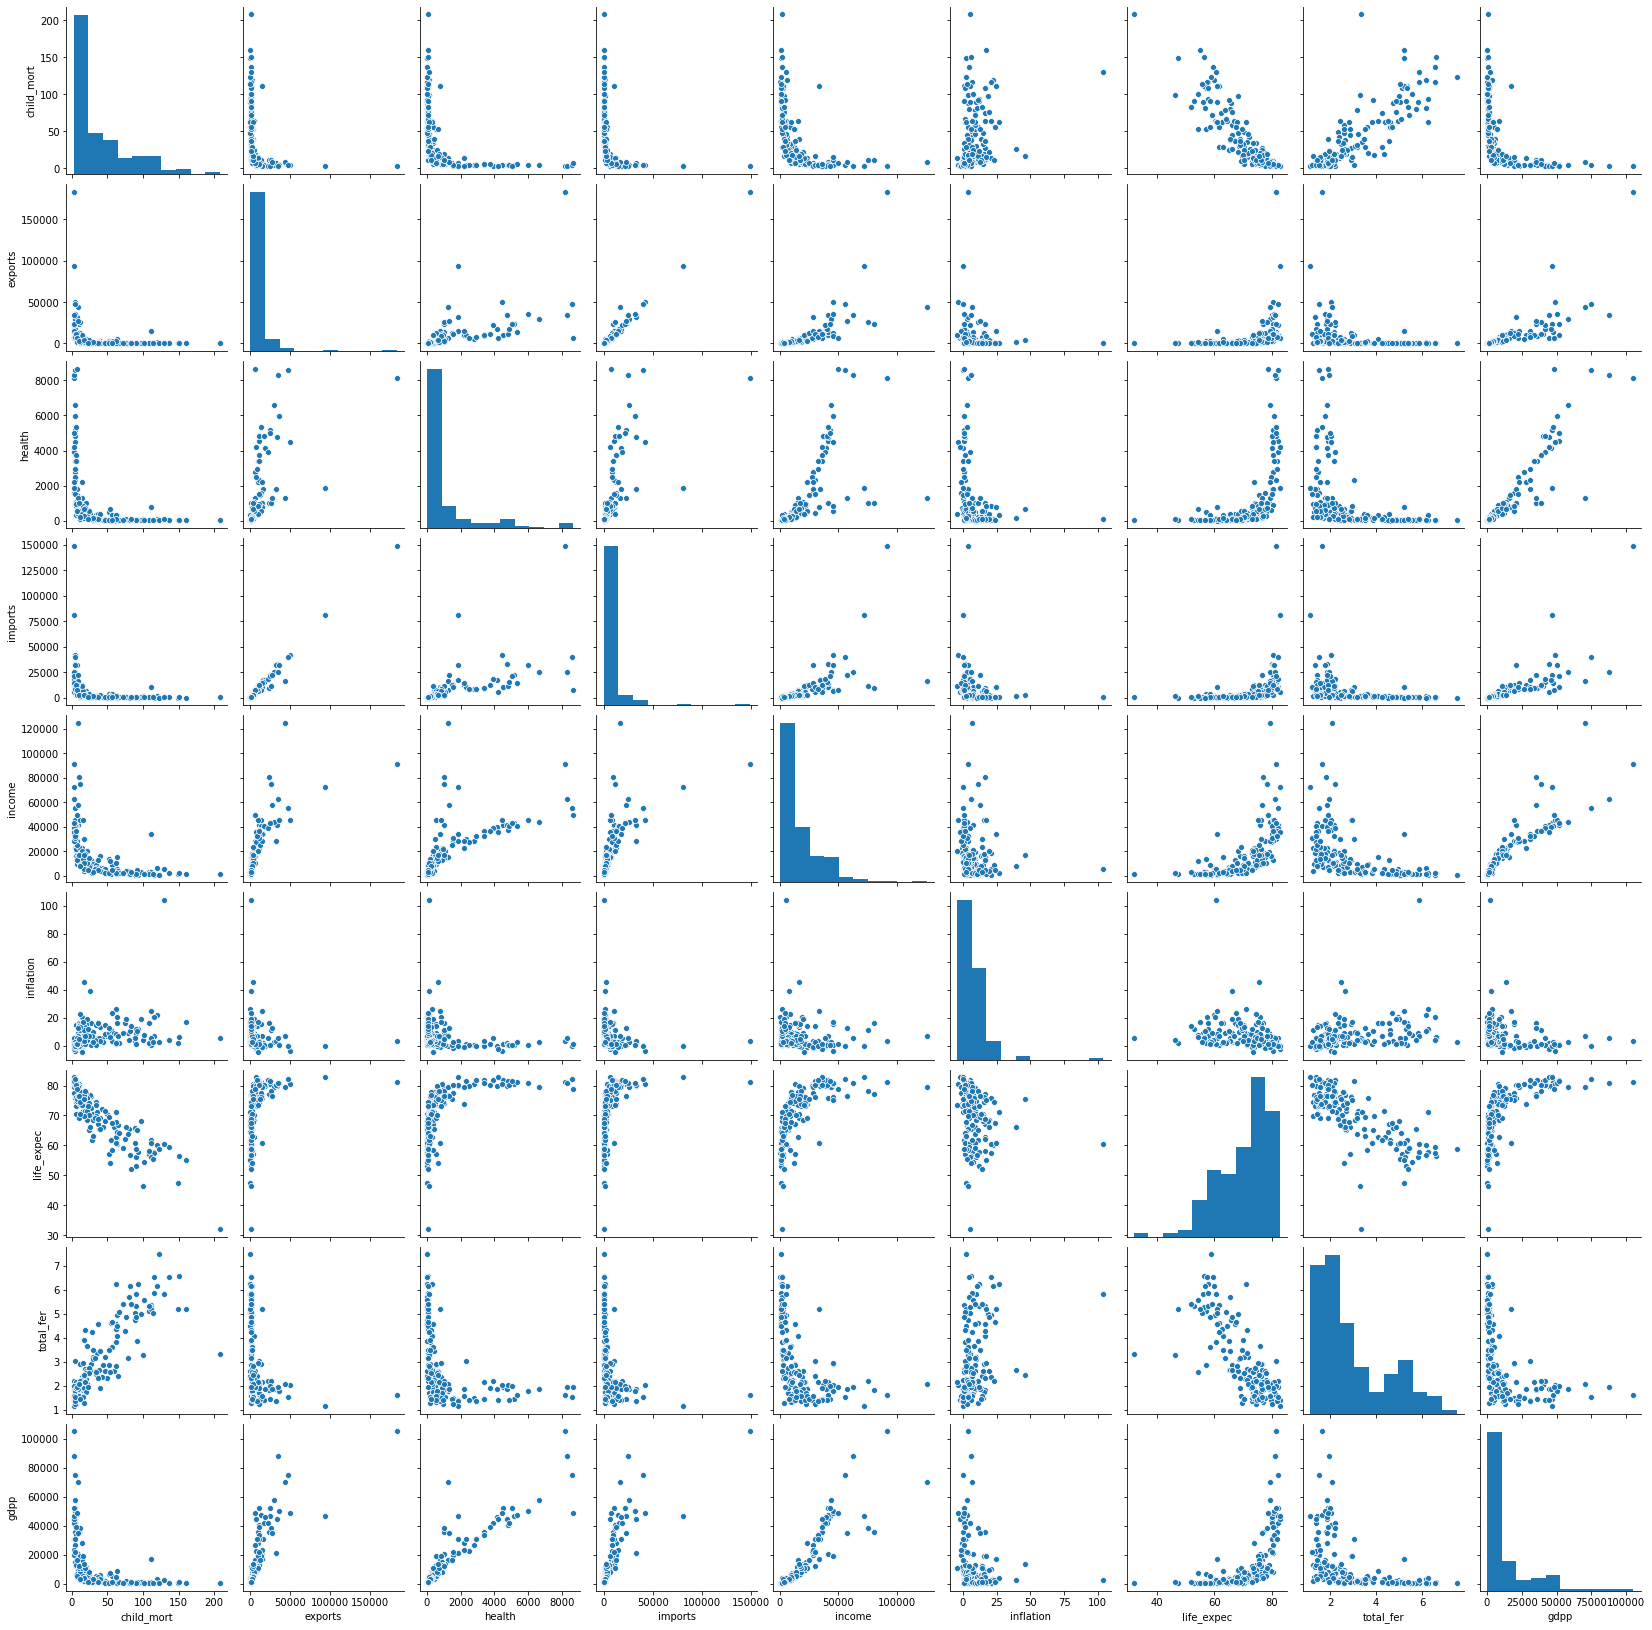

In [223]:
#make a pairplot of all the numeric variables
sns.pairplot(num_df)
plt.show()

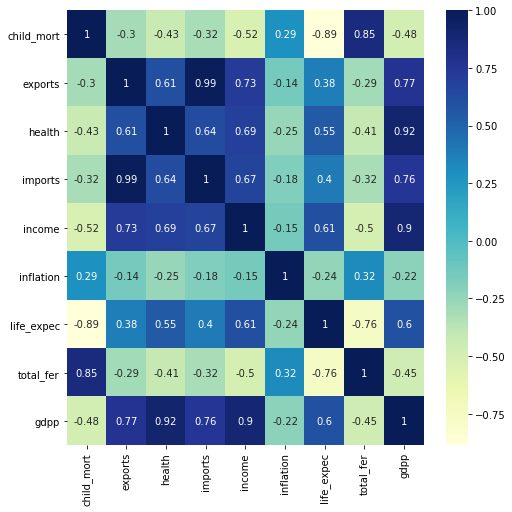

In [224]:
# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (8,8))  
sns.heatmap(num_df.corr(),annot = True,cmap="YlGnBu")
plt.show()

We can see high correlation b/w imports and exports,also gdp and health,total_fer&child_mort also have correlation

 Most of the data point are 'NOT Normally' distributed. - Their variance are also different. - Their range are also different All the above points indicates the need of standardising the data before we build the model. Since we need to compute the Euclidean distance between the data points, it is important to ensure that the attributes with a larger range of values do not out-weight the attributes with smaller range. Thus, scaling down of all attributes to the same normal scale is important here.

# Scaling the data

In [225]:
#Scaling the numerical data


# instantiate
scaler = StandardScaler()

# fit_transform
ngo_scaled = scaler.fit_transform(num_df)
ngo_scaled.shape

(167, 9)

In [226]:
ngo_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [227]:
ngo_scaled = pd.DataFrame(ngo_scaled)
ngo_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
ngo_scaled.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [228]:
ngo_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,9.174298e-17,-2.260334e-17,3.589943e-17,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-4.140371e-01,-5.812404e-01,-4.491604e-01,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-3.891452e-01,-5.446513e-01,-4.055539e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-3.149097e-01,-4.091560e-01,-3.097338e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,-7.958645e-03,-4.442811e-02,7.713036e-02,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,9.839814e+00,4.235432e+00,9.716681e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


# Hopkins Statistics

Before we apply any clustering algorithm to the given data, it's important to check whether the given data has some meaningful clusters or not? which in general means the given data is not random. The process to evaluate the data to check if the data is feasible for clustering or not is know as the clustering tendency. To check cluster tendency, we use Hopkins test. Hopkins test examines whether data points differ significantly from uniformly distributed data in the multidimensional space

In [229]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [230]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(ngo_scaled)

0.9475664252409652

Hopkins Statistic over .70 is a good score that indicated that the data is good for cluster analysis. - A 'Hopkins Statistic' value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0

# Hierarchical Clustering

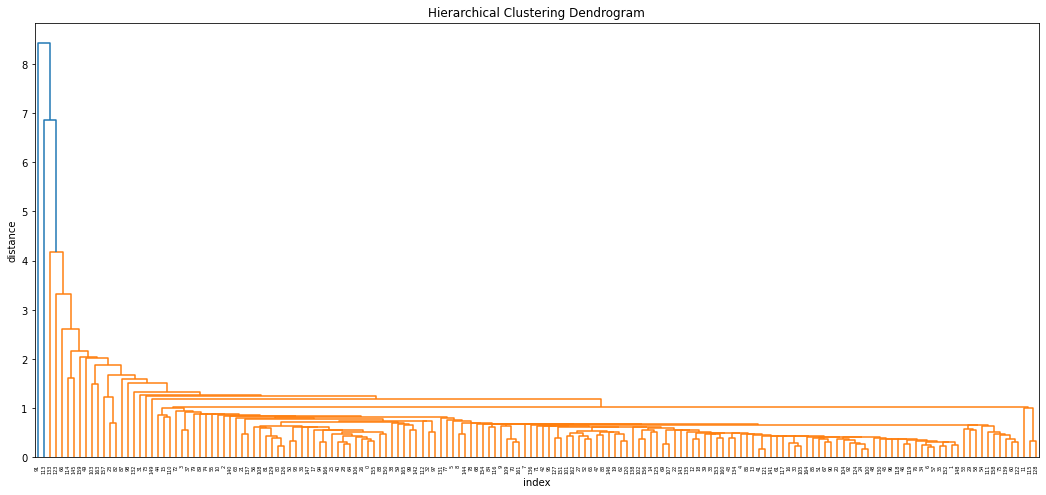

In [231]:
# single linkage: : Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_s = linkage(ngo_scaled, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()

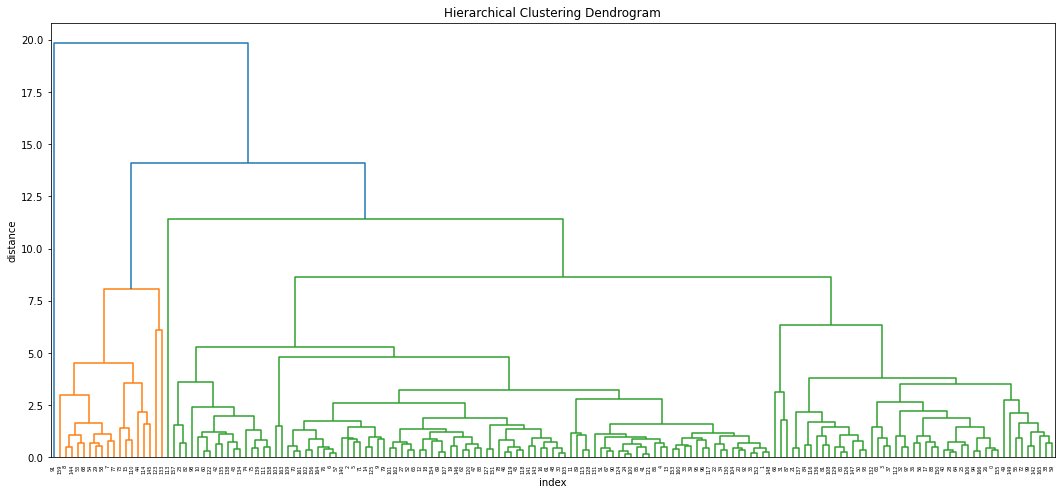

In [232]:
# complete linkage : Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_c = linkage(ngo_scaled, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

From the above Dendrograms,Complete Linkage gives a better cluster formation. So we will use Complete linkage output for our further analysis. We will build two iterations of clustering with 3 & 4 clusters (based on inputs from the above Dendrogram with Complete Linkage) and analyse the output.

# First Iteration - Using 3 Clusters

In [233]:
# 3 clusters
cluster_labels_3 = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [234]:
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [235]:
# Create a new datafame with cluster labels to it.
ngo_df2 = ngo_df.copy()
ngo_df2['cluster_labels_3'] = cluster_labels_3

ngo_df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [236]:
g=ngo_df2.columns[1:-1]

In [237]:
g

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [238]:
ngo_df2['cluster_labels_3'].value_counts()

0    148
1     18
2      1
Name: cluster_labels_3, dtype: int64

We can see maximum values are in cluster label 0  and there is only 1 value for cluster label 2

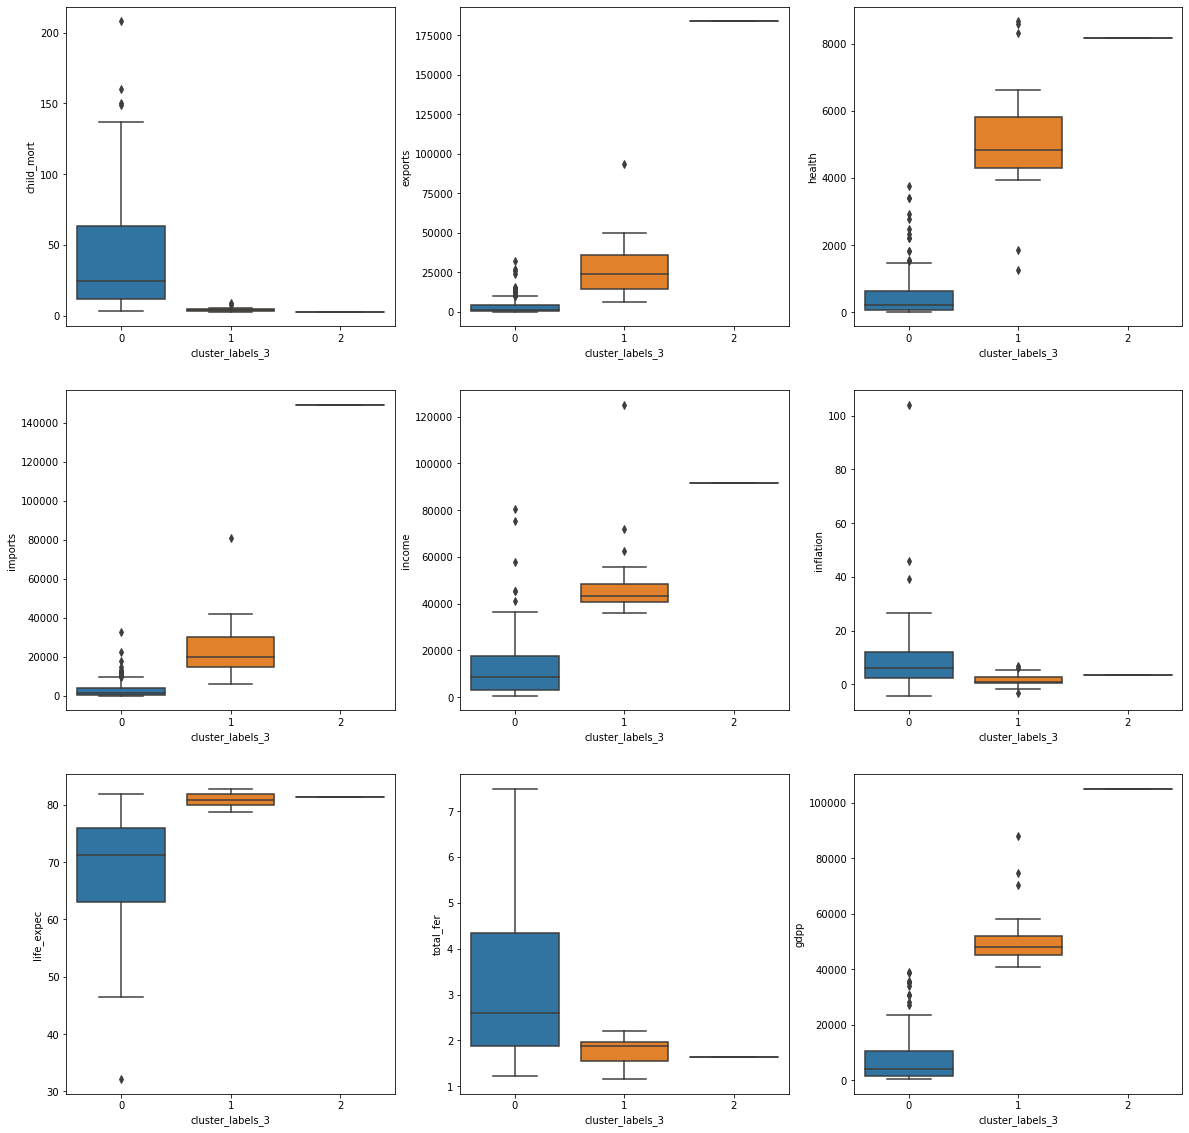

In [239]:
plt.figure(figsize=(20,20))
for i in enumerate(g):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x='cluster_labels_3',y=i[1],data=ngo_df2)

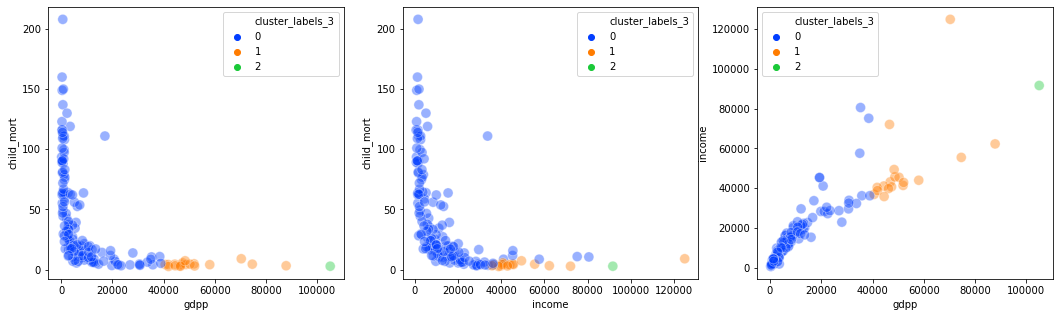

In [240]:
# Making Scatter plot on some important  variables to visualize the clusters depending on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_3',
                data=ngo_df2, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_3',
                data=ngo_df2, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_3',
                data=ngo_df2, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

From above we can see Child mort is high for Cluster label 0 with respect to gdp and income and income is comparatively is lower for this cluster with respect to gdp . Cluster 0 seems to be countries which are under developed countries

For Cluster label 2 we can see only 1 value and also for that we can see Child_Mort is low and income is on a very high side and seems to be a developed country

For Cluster label 1 we can see child mortality seems to be on a lower side and also income is higher and seems to be countries which are either developed/developing country

In [241]:
# Checking the only country present  in Cluster 2 to see which country is present  in that segment.

ngo_df2[ngo_df2['cluster_labels_3'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2


In [242]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

ngo_df2[ngo_df2['cluster_labels_3'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,1
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,1
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,1
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,1


# Second Iteration - Using 4 Clusters

In [243]:
# 4 clusters
cluster_labels_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [244]:
ngo_df2['cluster_labels_4'] = cluster_labels_4

ngo_df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [326]:
ngo_df2['cluster_labels_4'].value_counts(normalize=True)

0    0.886228
1    0.107784
2    0.005988
Name: cluster_labels_3, dtype: float64

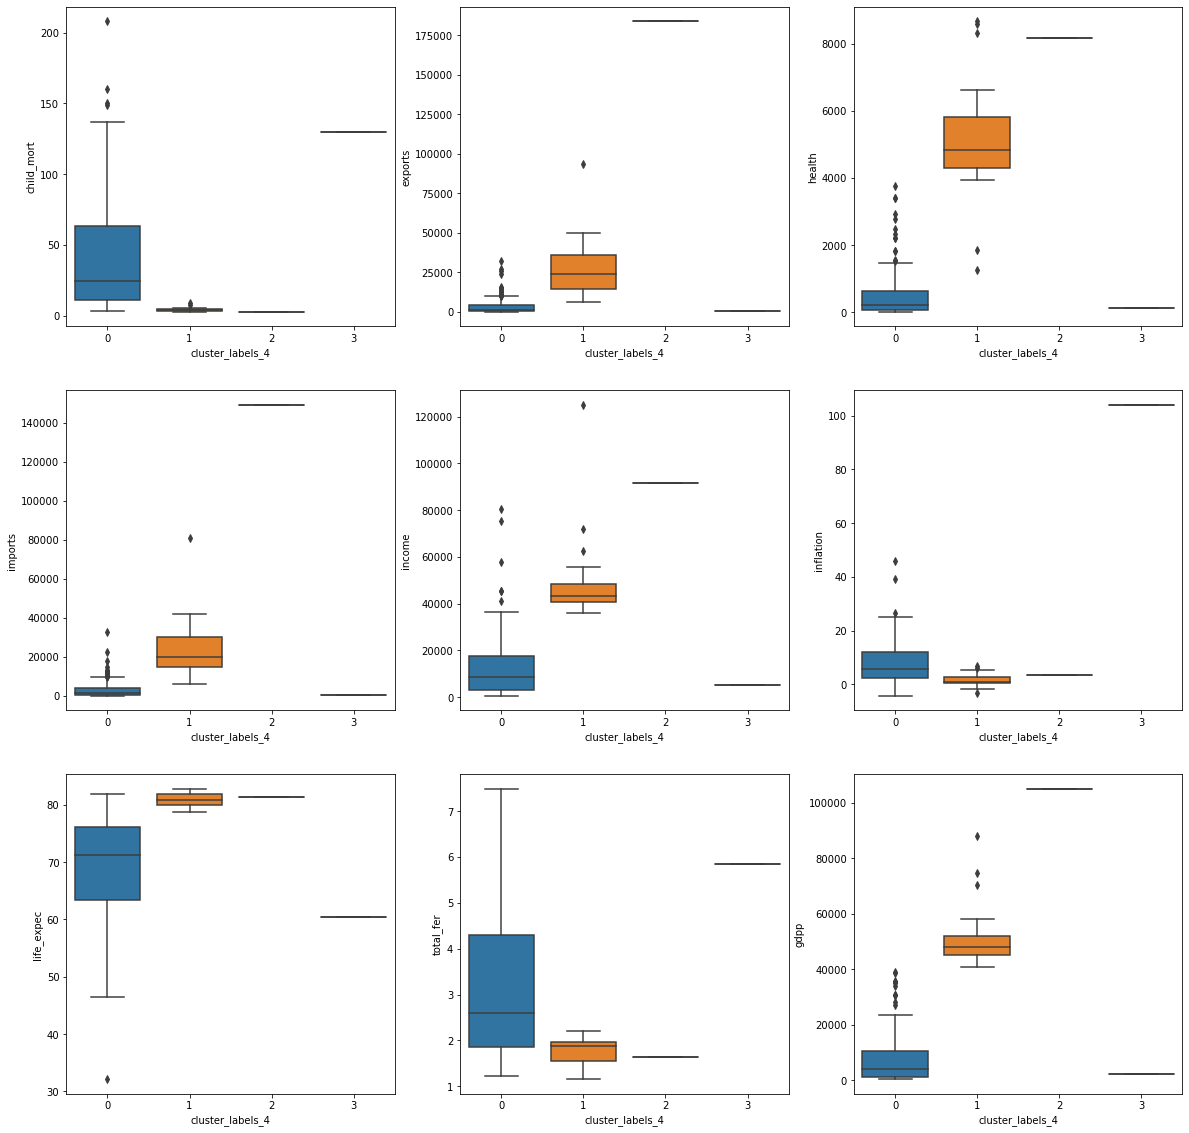

In [246]:
plt.figure(figsize=(20,20))
for i in enumerate(g):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x='cluster_labels_4',y=i[1],data=ngo_df2)

In [247]:
# Checking the country in Cluster 3 to see which country was added  in that segment.

ngo_df2[ngo_df2['cluster_labels_4'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,0,3


In [248]:
ngo_df2[ngo_df2['cluster_labels_4'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2,2


It is evident that 3 CLUSTERS is ideal number of clusters, because when we used 4 clusters, we could see that Nigeria was added as a seperate segment. Since Nigeria could be a possible candidate for financial aid in terms of their child mortality rate, we will consider the ideal number of cluster to be 3. We will further validate with other methods below. 


# Interpreting the Clusters from Hierarchical model


In [249]:
ngo_df2.drop('cluster_labels_4',inplace=True,axis=1)

In [250]:
ngo_df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [251]:
ngo_grouped =ngo_df2.groupby(['cluster_labels_3']).mean()
ngo_grouped.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels_3,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000


<Figure size 576x360 with 0 Axes>

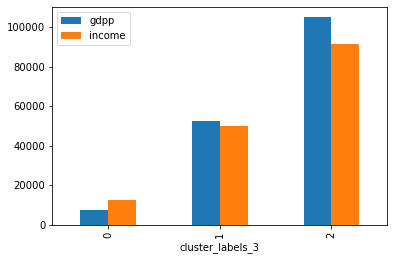

In [252]:
plt.figure(figsize=(8, 5))
ngo_grouped_plot=ngo_grouped[['gdpp','income']].copy()
ngo_grouped_plot.plot.bar()
plt.show()

<Figure size 576x360 with 0 Axes>

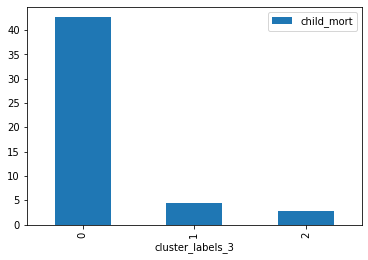

In [253]:
plt.figure(figsize=(8, 5))
ngo_grouped_plot=ngo_grouped[['child_mort']].copy()
ngo_grouped_plot.plot.bar()
plt.show()

Interpretation of Clusters: Cluster 0 has the Highest average Child Mortality rate of ~42 when compared to other 2 clusters, and Lowest average GDPP & Income of ~ 7551 & 12641 respectively. All these figures clearly makes this cluster the best candidate for the financial aid from NGO. We could also see that Cluster 0 comprises of ~89% of overall data, and has ~148 observations in comparision to 167 total observations This seems to be a problem. This means that Hierarchical clustering is not giving us a good result as 89% of the data points are segmented into that cluster. We also saw that increasing the cluster number is not solving this problem. We will perform K-Means Clustering and check how that turns out to be. ---

# Finding the Optimal Number of Clusters

In [254]:
ngo_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## SSD (Elbow Curve)

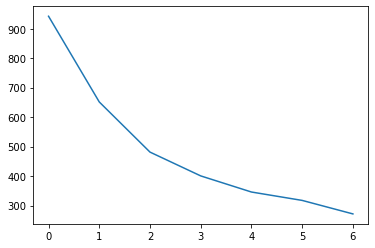

In [255]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(ngo_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.show()

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

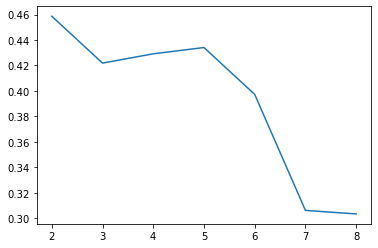

In [323]:
# Let's find the value of K
# Silhouette Score(2-9)

from sklearn.metrics import silhouette_score

sil = []

for k in range(2,9):
    kmean = KMeans(n_clusters = k, random_state = 0).fit(ngo_scaled)
    sil.append([k, silhouette_score(ngo_scaled, kmean.labels_)])

sil = pd.DataFrame(sil)

plt.plot(sil[0], sil[1])

In [256]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(ngo_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(ngo_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.4277518271600435
For n_clusters=5, the silhouette score is 0.43077513396770467
For n_clusters=6, the silhouette score is 0.405524012004562
For n_clusters=7, the silhouette score is 0.31024236071048966
For n_clusters=8, the silhouette score is 0.30347130034893205


In [322]:
ngo_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


From the above validations(Elbow Curve & silhouette analysis), we could see that 3,4 or 5 clusters are optimal number of clusters to be used.We will go ahead with Cluster=3 and 4 check which Cluster size is appropriate

# K-Means Clustering

## First Iteration - Using 3 Clusters

In [257]:
# K Means with with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=500, init='k-means++', n_init=10, random_state= 400)
kmeans_3.fit(ngo_scaled)

KMeans(max_iter=500, n_clusters=3, random_state=400)

In [258]:
kmeans_3.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [259]:
ngo_df3=ngo_df2.copy()
ngo_df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [260]:
# assigning  the label for Cluster=3 for K-Means
ngo_df3['cluster_id_3'] = kmeans_3.labels_
ngo_df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_id_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [261]:
# Checking the number of countries in each cluster

ngo_df3.cluster_id_3.value_counts()

0    91
1    48
2    28
Name: cluster_id_3, dtype: int64

We can see that is more spread in the clusters compared to earlier derived Clusters from Hierarchial Clustering

### Visualizing the Clustered Data

In [262]:
k=ngo_df3.columns[1:-2]

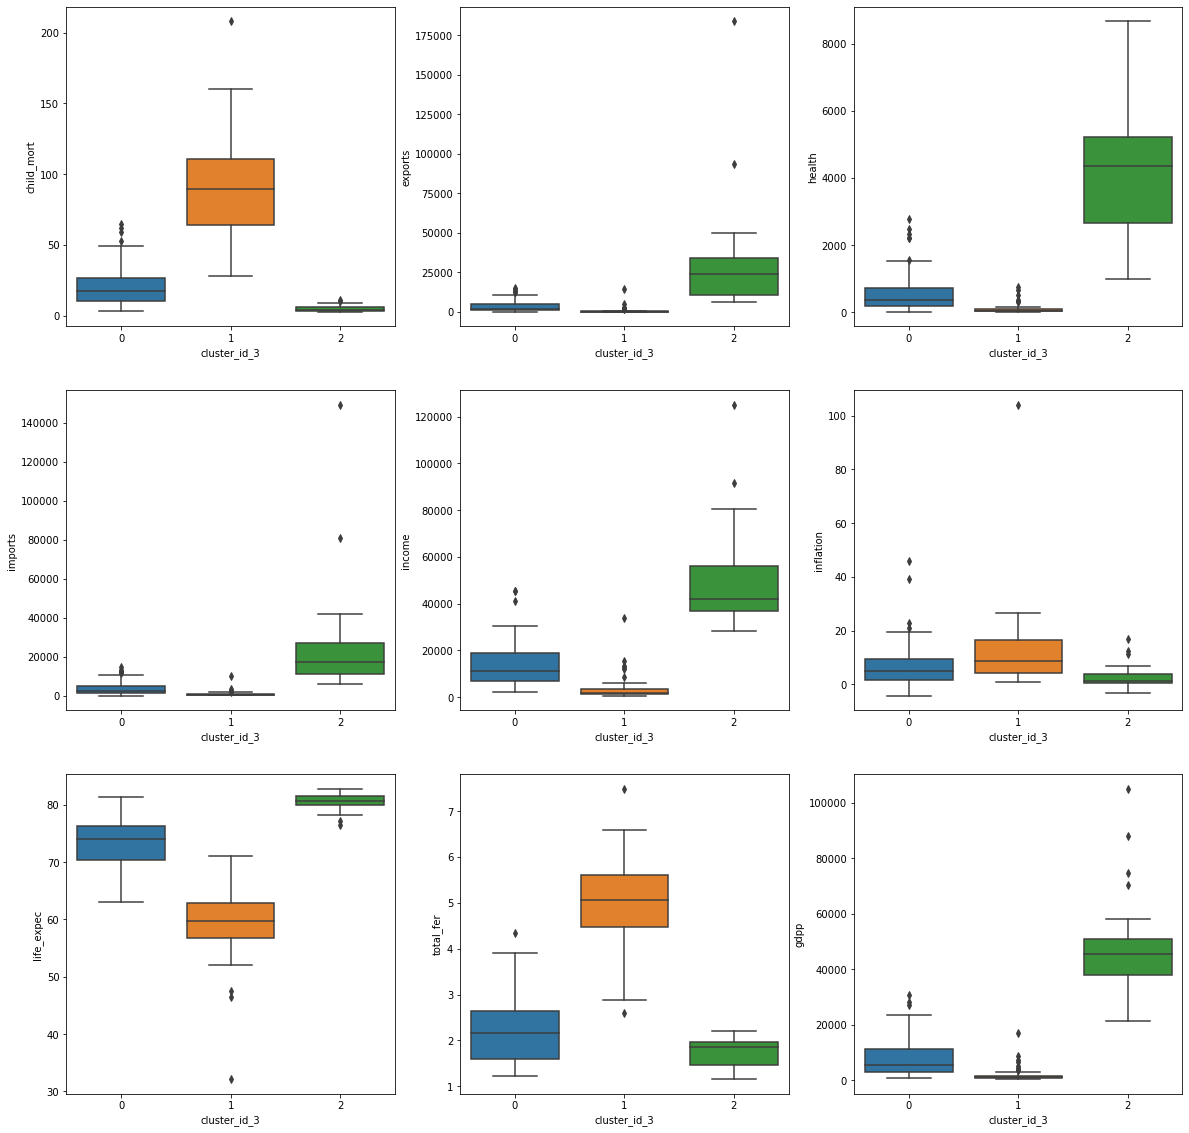

In [263]:
plt.figure(figsize=(20,20))
for i in enumerate(k):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x='cluster_id_3',y=i[1],data=ngo_df3)

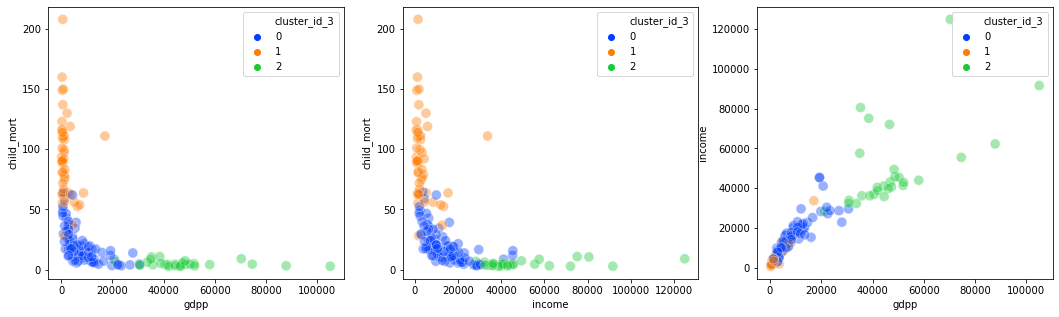

In [264]:
# Making Scatter plot on some important  variables to visualize the clusters depending on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_3',
                data=ngo_df3, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_3',
                data=ngo_df3, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_3',
                data=ngo_df3, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

From above we can see Child mort is high for Cluster id 1 with respect to gdp and income and income,gdp is comparatively lower for this cluster. Cluster 1 seems to be countries which are under developed countries

For Cluster id 2 we can see that the Child_Mort is very low and income,gdp  is on a very high side and seems that this cluster represents developed countries

For Cluster id 1 we can see child mortality seems to be on a lower side and also income is higher but lower than income of Cluster id 2 and seems to be countries which are either developed/developing country

In [265]:
# Checking the CLuster means:
ngo_df3.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
cluster_id_3,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000
2,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286


Cluster 1 & 0 seem to have high child_mort rate (1 having the highest) income and gdp also seems to be lower for these Clusters 

In [266]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

ngo_df3[['country','child_mort','income','gdpp']][ngo_df3['cluster_id_3'] == 1].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
113,Nigeria,130.0,5150,2330
112,Niger,123.0,814,348
3,Angola,119.0,5900,3530
37,"Congo, Dem. Rep.",116.0,609,334
25,Burkina Faso,116.0,1430,575


In [267]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

ngo_df3[['country','child_mort','income','gdpp']][ngo_df3['cluster_id_3'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
107,Myanmar,64.4,3720,988
154,Turkmenistan,62.0,9940,4440
69,India,58.8,4410,1350
146,Tajikistan,52.4,2110,738
12,Bangladesh,49.4,2440,758
...,...,...,...,...
138,South Korea,4.1,30400,22100
122,Portugal,3.9,27200,22500
60,Greece,3.9,28700,26900
43,Czech Republic,3.4,28300,19800


## Second Iteration - Using 4 Clusters

In [268]:
# K Means with with k=4
kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 400)
kmeans_4.fit(ngo_scaled)

KMeans(max_iter=500, n_clusters=4, random_state=400)

In [269]:
kmeans_4.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 0,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 1, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1])

In [270]:
# assign the label
ngo_df3['cluster_id_4'] = kmeans_4.labels_
ngo_df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,1,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,1,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,0


In [271]:
# Checking the number of countries in each cluster

ngo_df3.cluster_id_4.value_counts()

0    88
1    48
3    29
2     2
Name: cluster_id_4, dtype: int64

### Visualizing the Clustered Data



In [272]:
k=ngo_df3.columns[1:-3]

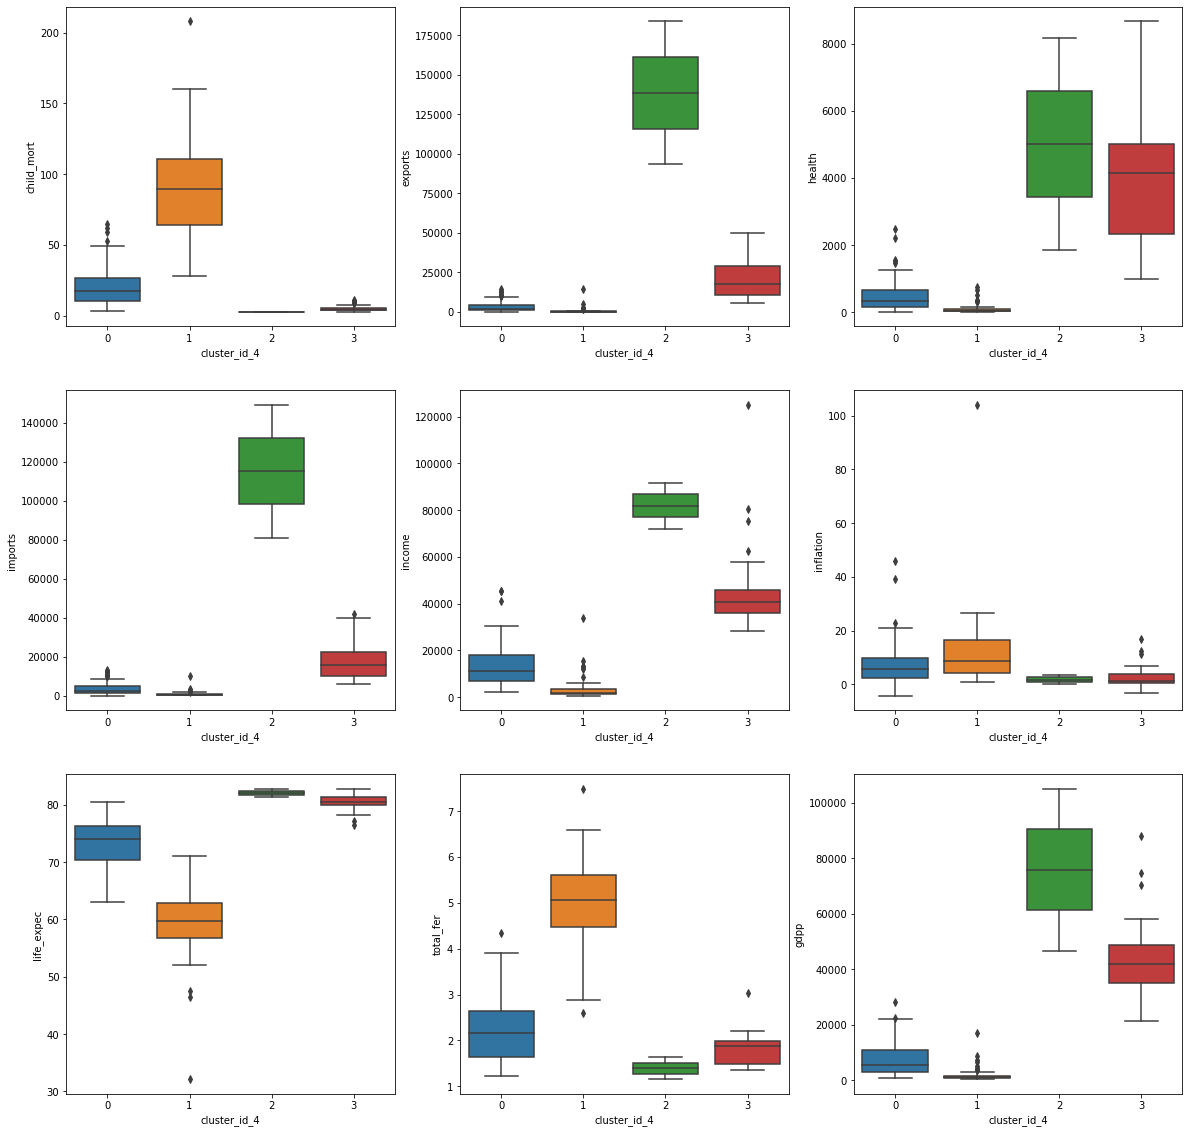

In [273]:
plt.figure(figsize=(20,20))
for i in enumerate(k):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x='cluster_id_4',y=i[1],data=ngo_df3)

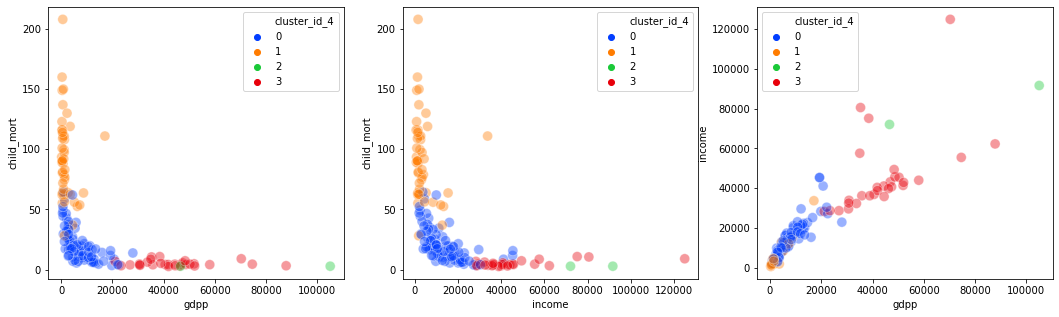

In [274]:
# Scatter plot on important variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_4',
                data=ngo_df3, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_4',
                data=ngo_df3, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_4',
                data=ngo_df3, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [275]:
# Checking the CLuster means:
ngo_df3.groupby(['cluster_id_4']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_id_3
cluster_id_4,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,1.000000
0,20.918182,3366.778392,482.897845,3461.435467,13455.568182,7.295045,73.222727,2.242159,7332.636364,0.000000,0.000000
3,5.082759,21511.096552,4084.970000,18129.900000,45800.000000,2.837690,80.403448,1.813793,44017.241379,0.586207,1.793103
2,2.800000,138475.000000,5001.930000,115092.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000,1.500000,2.000000


Agaim we can se Cluster 1 & Cluster 0 seems to have high Child Mortality and lowest Income & GDPP. 

In [276]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

ngo_df3[['country','child_mort','income','gdpp']][ngo_df3['cluster_id_4'] == 1].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
113,Nigeria,130.0,5150,2330
112,Niger,123.0,814,348
3,Angola,119.0,5900,3530
37,"Congo, Dem. Rep.",116.0,609,334
25,Burkina Faso,116.0,1430,575


In [277]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

ngo_df3[['country','child_mort','income','gdpp']][ngo_df3['cluster_id_4'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
107,Myanmar,64.4,3720,988
154,Turkmenistan,62.0,9940,4440
69,India,58.8,4410,1350
146,Tajikistan,52.4,2110,738
12,Bangladesh,49.4,2440,758
...,...,...,...,...
41,Croatia,5.5,20100,13500
51,Estonia,4.5,22700,14600
138,South Korea,4.1,30400,22100
122,Portugal,3.9,27200,22500


In [278]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

ngo_df3[['country','child_mort','income','gdpp']][ngo_df3['cluster_id_4'] == 2].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
133,Singapore,2.8,72100,46600
91,Luxembourg,2.8,91700,105000


## Choosing the model
From the above 2 Iterations of K-Means, we could see that using 3 Clusters provided a better output in terms of a balanced cluster size. So we will consider the 'K-Means with 3 Clusters' as our FINAL MODEL

In [279]:
ngo_df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,1,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,1,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,0


In [280]:
#New dataframe for group by & analysis

ngo_df3.drop('cluster_id_4',inplace=True,axis=1)

In [281]:
ngo_grouped=ngo_df3.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

ngo_grouped.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
cluster_id_3,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000
2,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286


In [282]:
# Creating a new field for count of observations in each cluster

ngo_grouped['Observations']=ngo_df3[['cluster_id_3','child_mort']].groupby(['cluster_id_3']).count()
ngo_grouped

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,Observations
cluster_id_3,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,48
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,91
2,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,28


In [283]:
# Creating a new field for proportion of observations in each cluster

ngo_grouped['Proportion']=round(ngo_grouped['Observations']/ngo_grouped['Observations'].sum(),2)

In [284]:
#Summary View with max
ngo_grouped[['child_mort','income','gdpp','Observations','Proportion']]

,child_mort,income,gdpp,Observations,Proportion
cluster_id_3,,,,,
1,91.610417,3897.354167,1909.208333,48,0.29
0,20.357143,13968.021978,7979.912088,91,0.54
2,5.046429,50178.571429,48114.285714,28,0.17


<Figure size 576x360 with 0 Axes>

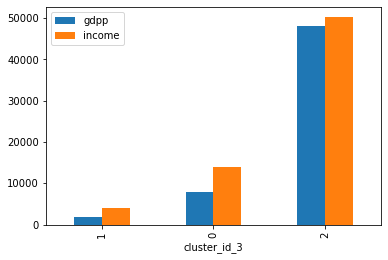

In [285]:
plt.figure(figsize=(8, 5))
ngo_grouped_plot=ngo_grouped[['gdpp','income']].copy()
ngo_grouped_plot.plot.bar()
plt.show()

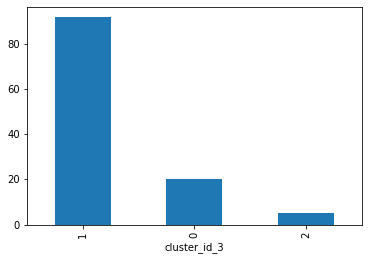

In [286]:
ngo_grouped['child_mort'].plot.bar()
plt.show()

Cluster 1 has the Highest average Child Mortality rate of ~92 when compared to other 2 clusters, and Lowest average GDPP & Income of ~ 1909 & 3897 respectively. All these figures clearly makes this cluster the best candidate for the financial aid from NGO. We could also see that Cluster 2 comprises of ~29% of overall data, and has ~48 observations in comparision to 167 total observations ---

In [291]:
#Renaming the clusters
ngo_grouped =ngo_grouped.rename({
    1: 'Under_Developed Countries',
    2: 'Developed Countries',
    0: 'Developing Countries'}).reset_index()

In [292]:
ngo_grouped[['cluster_id_3','child_mort','income','gdpp','Observations','Proportion']]

,cluster_id_3,child_mort,income,gdpp,Observations,Proportion
0,Under_Developed Countries,91.610417,3897.354167,1909.208333,48,0.29
1,Developing Countries,20.357143,13968.021978,7979.912088,91,0.54
2,Developed Countries,5.046429,50178.571429,48114.285714,28,0.17


Based on the above interpretation of the cluster, we now rename all the clusters accordingly. The Cluster 1 now becomes 'Under Developed Countries', which will be of our interest. --- We will further analyse the Cluster 'Under Developed Countries' and get to know various metrics of that data set, based on which we could identify our final set of countries which needs the financial support from the NGO

## Analysing the 'Under Developed Countries' Cluster

In [293]:
ngo_df3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_id_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,0,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,0,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,0,0
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,0,1


In [295]:
# Countries in Cluster_id = 0, save to a new dataframe, this will form our target cluster data

target_cluster = ngo_df3[ngo_df3['cluster_id_3'] == 1].copy()
target_cluster = target_cluster[['country', 'child_mort', 'income', 'gdpp']]

target_cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

,country,child_mort,income,gdpp
26,Burundi,93.6,764,231
88,Liberia,89.3,700,327
37,"Congo, Dem. Rep.",116.0,609,334
112,Niger,123.0,814,348
132,Sierra Leone,160.0,1220,399
93,Madagascar,62.2,1390,413
106,Mozambique,101.0,918,419
31,Central African Republic,149.0,888,446
94,Malawi,90.5,1030,459
50,Eritrea,55.2,1420,482


# Decision Making on the final approach

In [297]:
target_cluster.describe()

,child_mort,income,gdpp
count,48.000000,48.000000,48.000000
mean,91.610417,3897.354167,1909.208333
std,34.319855,5590.168621,2925.911009
min,28.100000,609.000000,231.000000
25%,63.675000,1390.000000,551.500000
50%,89.750000,1860.000000,932.000000
75%,111.000000,3522.500000,1465.000000
max,208.000000,33700.000000,17100.000000


Looking at the stats  of Under Developed Countries cluster above, we notice that some of the countries have really high income and gdpp values (looking at the max values of income & gdpp). From a business problem prespective, we would want our numbers of child mortality, income and gdpp somewhere around the MEDIAN level (We will go ahead with MEDIAN and not MEAN, as there seems to be a greater variablity in the income and gdpp values). So the approach will be to filter out all countries from our target cluste with income & gdpp less than the Median of 1860 & 932 respectively and Child Mortality >= the Median of 90. --- We will perform the filtering in the order GDPP --> INCOME --> CHILD MORTALITY --- This is due to reason that, we need to identify the countries with lowest GDPP & INCOME first and then with maximum CHILD MORTALITY. This is based on the understanding that, countries with highest child mortality and having higher gdpp & income will not have any impact on the child mortality rate even after the financial aid.

## Countries having GDPP less than the median gdpp of the cluster

We could see that the Median values of gdpp for 'Under Developed Countries' is ~932. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with gdpp <= 932

In [300]:
Under_Developed_Countries = ngo_df[ngo_df['gdpp'] <= 932].copy()
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [301]:
Under_Developed_Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399


In [302]:
Under_Developed_Countries.shape

(29, 10)

In [303]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

,country,child_mort,gdpp,income
26,Burundi,93.6,231,764
88,Liberia,89.3,327,700
37,"Congo, Dem. Rep.",116.0,334,609
112,Niger,123.0,348,814
132,Sierra Leone,160.0,399,1220
93,Madagascar,62.2,413,1390
106,Mozambique,101.0,419,918
31,Central African Republic,149.0,446,888
94,Malawi,90.5,459,1030
50,Eritrea,55.2,482,1420


In [304]:
#Filtering out the countries with income less than the median of 1860

Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['income'] <= 1860]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [305]:
Under_Developed_Countries.shape

(21, 10)

In [306]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

,country,child_mort,gdpp,income
26,Burundi,93.6,231,764
88,Liberia,89.3,327,700
37,"Congo, Dem. Rep.",116.0,334,609
112,Niger,123.0,348,814
132,Sierra Leone,160.0,399,1220
93,Madagascar,62.2,413,1390
106,Mozambique,101.0,419,918
31,Central African Republic,149.0,446,888
94,Malawi,90.5,459,1030
50,Eritrea,55.2,482,1420


In [307]:
#Filtering out the countries having median of child mort >90

Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['child_mort'] >= 90]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [308]:
Under_Developed_Countries.shape

(14, 10)

In [309]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

,country,child_mort,gdpp,income
26,Burundi,93.6,231,764
37,"Congo, Dem. Rep.",116.0,334,609
112,Niger,123.0,348,814
132,Sierra Leone,160.0,399,1220
106,Mozambique,101.0,419,918
31,Central African Republic,149.0,446,888
94,Malawi,90.5,459,1030
150,Togo,90.3,488,1210
64,Guinea-Bissau,114.0,547,1390
0,Afghanistan,90.2,553,1610


In [310]:
# Save the top 10 underdeveloped list to a new df

top10_UDC=Under_Developed_Countries[['country', 'gdpp', 'income', 'child_mort']].head(10)

In [311]:
top10_UDC

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
94,Malawi,459,1030,90.5
150,Togo,488,1210,90.3
64,Guinea-Bissau,547,1390,114.0
0,Afghanistan,553,1610,90.2


In [315]:
top10_UDC.describe()

,gdpp,income,child_mort
count,10.00000,10.000000,10.00000
mean,422.40000,1045.300000,112.76000
std,99.62396,309.034356,25.11344
min,231.00000,609.000000,90.20000
25%,360.75000,832.500000,91.27500
50%,432.50000,974.000000,107.50000
75%,480.75000,1217.500000,121.25000
max,553.00000,1610.000000,160.00000


# Univariate Analysis of Cluster Top 10 UDC

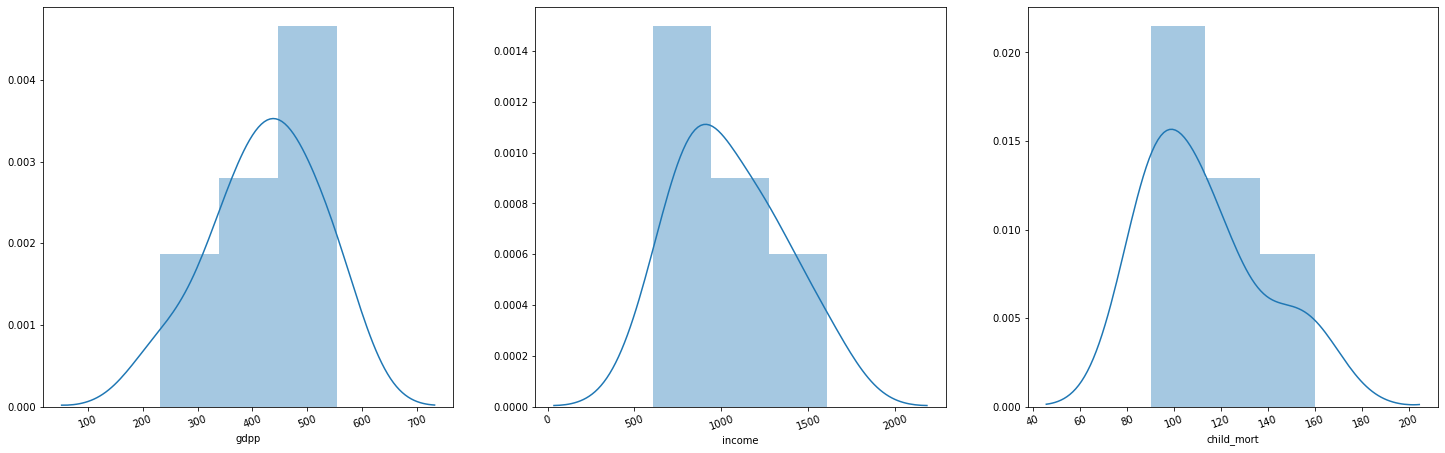

In [319]:
plt.figure(figsize=(25, 25))
features = ['gdpp','income','child_mort']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(top10_UDC[i[1]])
    plt.xticks(rotation=20)

# Bivariate Analysis of Cluster Top 10 UDC

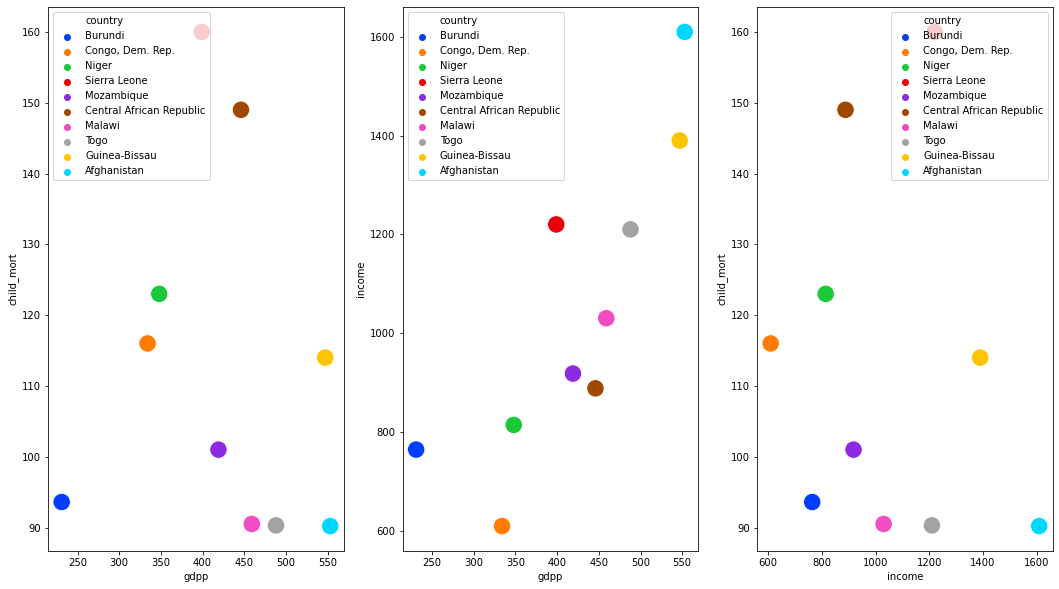

In [318]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='country',
                data=top10_UDC, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='country',
                data=top10_UDC, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='child_mort', hue='country',
                data=top10_UDC, legend='full', palette="bright", s=300, c='lightblue')
plt.show()

In [321]:
#TOP COUNTRIES recommended for Financial Aid

top10_UDC

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
94,Malawi,459,1030,90.5
150,Togo,488,1210,90.3
64,Guinea-Bissau,547,1390,114.0
0,Afghanistan,553,1610,90.2
